Following tutorial from [here](https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [21]:
batch_size = 64
epochs = 20
num_classes = 10

In [22]:
X = np.load('data/simulated_transit_lcs.npy')[:, :, np.newaxis]
labels = np.load('data/simulated_spots_occulted.npy').astype(int)#[:, np.newaxis]

In [23]:
X.shape

(10000, 300, 1)

In [24]:
from sklearn.model_selection import train_test_split

split = train_test_split(X, labels, test_size=0.2, random_state=13)
train_X, valid_X, train_label, valid_label = split

In [25]:
from keras.utils import to_categorical
valid_label = to_categorical(valid_label)
train_label = to_categorical(train_label)

In [26]:
n_timesteps, n_features, n_outputs = train_X.shape[0], train_X.shape[1], labels.shape[0]
nb_class = len(np.unique(labels))

In [27]:
nb_class

2

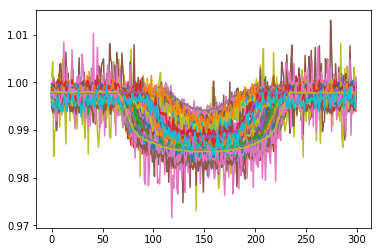

In [28]:
for transit in X[:100, :]: 
    plt.plot(transit)

In [29]:
X.shape[0], X.shape[1]# , X.shape[2]

(10000, 300)

In [30]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='linear', input_shape=(n_features, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(2, padding='same'))
model.add(Dropout(0.25))
model.add(Conv1D(filters=64, kernel_size=5, activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Conv1D(filters=128, kernel_size=5, activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(nb_class, activation='linear'))
model.add(LeakyReLU(alpha=0.1))    
model.add(Dropout(0.3))
model.add(Dense(nb_class, activation='softmax'))

In [31]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 300, 64)           384       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 300, 64)           0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 150, 64)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 150, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 150, 64)           20544     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 150, 64)           0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 75, 64)            0         
__________

In [32]:
train = model.fit(train_X, train_label, batch_size=batch_size, 
                  epochs=epochs, validation_data=(valid_X, valid_label))

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 8s 988us/step - loss: 0.3046 - acc: 0.9396 - val_loss: 0.2516 - val_acc: 0.9440
Epoch 2/20
8000/8000 [==============================] - 7s 905us/step - loss: 0.2775 - acc: 0.9415 - val_loss: 0.2297 - val_acc: 0.9440
Epoch 3/20
8000/8000 [==============================] - 8s 966us/step - loss: 0.2716 - acc: 0.9415 - val_loss: 0.2249 - val_acc: 0.9440
Epoch 4/20
8000/8000 [==============================] - 8s 986us/step - loss: 0.2712 - acc: 0.9415 - val_loss: 0.2190 - val_acc: 0.9440
Epoch 5/20
8000/8000 [==============================] - 8s 1ms/step - loss: 0.2594 - acc: 0.9415 - val_loss: 0.2253 - val_acc: 0.9440
Epoch 6/20
8000/8000 [==============================] - 8s 1ms/step - loss: 0.2560 - acc: 0.9415 - val_loss: 0.2318 - val_acc: 0.9440
Epoch 7/20
8000/8000 [==============================] - 8s 1ms/step - loss: 0.2493 - acc: 0.9415 - val_loss: 0.2471 - val_acc: 0.9440
Epoch 

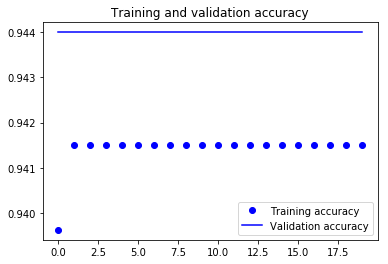

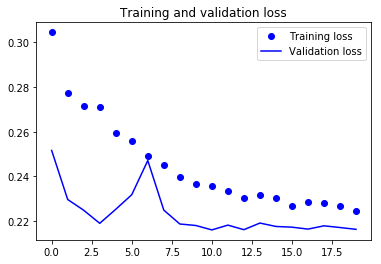

In [33]:
accuracy = train.history['acc']
val_accuracy = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
model.save('data/model.hdf5')